In [38]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Activation
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical, plot_model
import graphviz
from sklearn.metrics import accuracy_score
import pickle

In [2]:
#keras has already included the MNIST dataset
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Data is in the form of pixel values not actual images

In [4]:
X_train.shape


(60000, 28, 28)

 Our training dataset(3 D array) consists of  data of 60,000 images each image is a numpy array of(28,28)

In [5]:
X_train[0].shape#28x28 sized images

(28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

Our testing dataset(3 D array) consists of  data of 10,000 images each image is a numpy array of(28,28)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

y_train consists of labels which shows the digit present in each image
Now in the next step we will convert pixel value to image using matplotlib

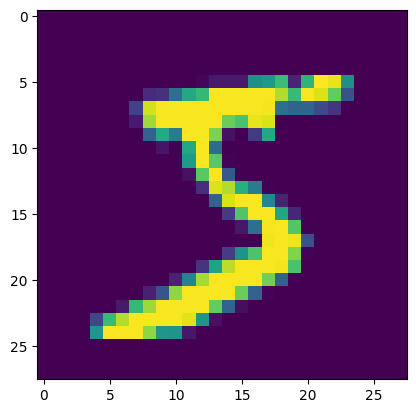

In [8]:
plt.imshow(X_train[0])

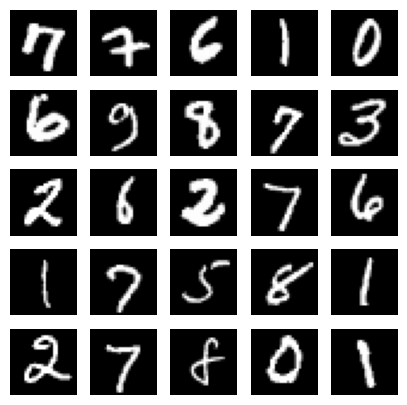

In [9]:
# Data Visualization:The following code will help to sample the 25 random MNIST digits and visualize them.
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, X_train.shape[0], size=25)
images = X_train[indexes]
labels = y_train[indexes]# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Data Preprocessing: NORMALIZING THE DATA
If we see each image consists of pixel values from 0 to 255
Thus value should only be in the range of 0 t0 1 because pixel values should be in similar range so that weights are generated more quickly and conversions are fast

In [11]:
X_train=X_train/255
X_test=X_test/255

In [12]:
#After normalization
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Designing our model architecture
1.Now we wil add layers to our model using keras sequential model
We need to flatten the array to convert (28,28) 2D pixel value to 784 pixel value using flatten layer that converts higher dimensional array to 1 D array.
2.The main data structure in Keras is the Sequential class, which allows the creation of a basic neural network.
The Sequential class of the Keras library is a wrapper for the sequential neural network model that Keras offers

In [13]:
#Resizing the image for kernel operation
#increasing dimensions for kernel(filter) operation
X_train=np.expand_dims(X_train,axis=-1)
X_train.shape

(60000, 28, 28, 1)

In [14]:
X_test=np.expand_dims(X_test,axis=-1)
X_test.shape

(10000, 28, 28, 1)

In [15]:
dropout=0.45
model=Sequential()
#First convolutional layer 0 1 2 3(60000,28,28,1   28=3+1=26x26
model.add(Conv2D(64,(3,3),activation='relu',input_shape=X_train.shape[1:]))#(1x784)specifying the input_shape as parameter,only for first convolutional layer to maintain the input size
model.add(Activation("relu"))#Activationfunction to make it non linear,<0,remove,>0
model.add(MaxPooling2D(pool_size=(2,2)))#It will get  a single maximum vale of 2x2 matrix
#Second convolutional layer 26-3+1=24x24
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#Third convolutional layer
model.add(Conv2D(64,(3,3),activation='relu'))#24x24
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#Fully Connected Layer 20x20=400neurons will be passed as input to flatten layer
model.add(Flatten())#2D to 1D
model.add(Dropout(dropout))
model.add(Dense(128,activation='relu'))#Output of flatten layer passed to dense which consists of 128 nodes
model.add(Dropout(dropout))
model.add(Dense(32,activation='relu'))
#Always remember when you have more than one node at the output layer we will use the activation function softmax for classification
model.add(Dense(10,activation='softmax'))#for multiclass classification problem softmax is the best 
#Always remember when you have more than one node at the output layer we will use the activation function softmax for classification


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

From  model summary
Dropout layer randomly removes the fraction of units from participating in the next layer.
it can be noted that no parameters are passesd in the flatten layer ,thus no training is performed at the flatten layer.
Now,coming to the dense layer 8320 parameters were passed((64 inputs*128 nodes)+128 biases)
At the next dense layer 4128 parameters were passed((128 inputs*32 nodes)+32)
At the next layer we have  330 trainable parameters(32 nodes passed as inputs*10 nodes)+10 biases at the output layer

Total parameters denotes the total weights and biases in the model

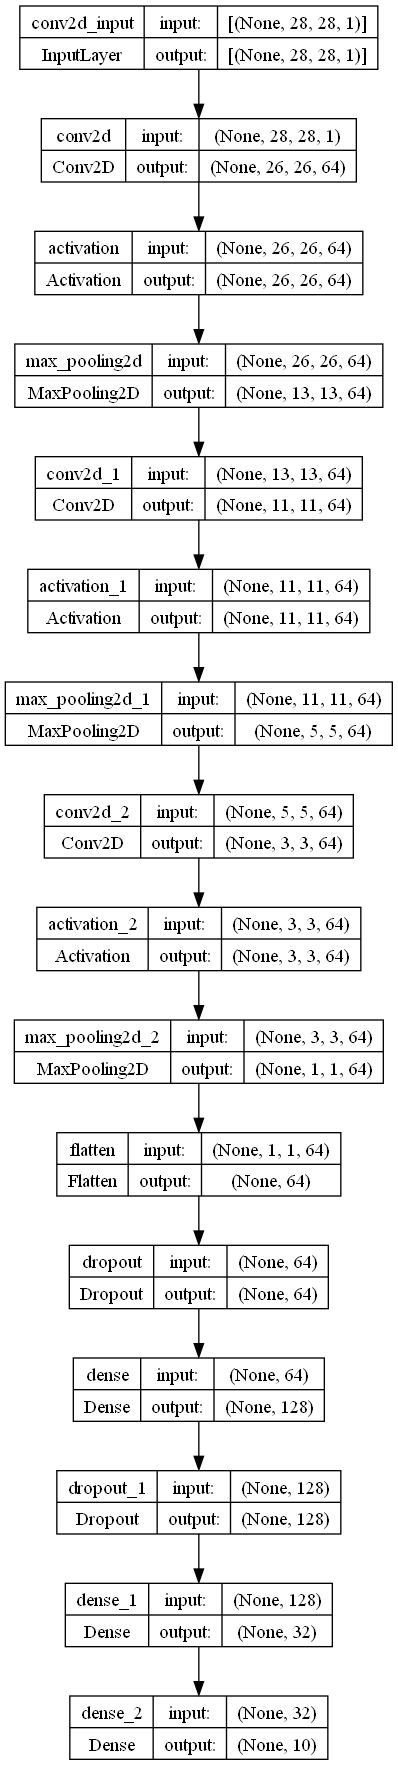

In [17]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)#plot_model is an API for model visualization

COMPILING THE MODEL
1.Now the point here to be noted is that in place of 'sparse_categorical_crossentropy' you can also use 'categorical_crossentropy'.
The only difference is that in the former, there is no need to one-hot- encode the labels while in the latter there is a need to one-hot- encode the labels.

In [18]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

Loss function:How far the predicted tensor is from the one-hot ground truth vector is called loss.We are e ing se categorical_crossentropy as the loss function. It is the negative of the sum of the product of the target and the logarithm of the prediction.

In [19]:
#Training the model
history=model.fit(X_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 95s 62ms/step - loss: 0.5869 - accuracy: 0.8079 - val_loss: 0.1060 - val_accuracy: 0.9697
Epoch 2/5
1500/1500 [==============================] - 88s 59ms/step - loss: 0.2205 - accuracy: 0.9350 - val_loss: 0.0789 - val_accuracy: 0.9780
Epoch 3/5
1500/1500 [==============================] - 87s 58ms/step - loss: 0.1726 - accuracy: 0.9492 - val_loss: 0.0713 - val_accuracy: 0.9808
Epoch 4/5
1500/1500 [==============================] - 90s 60ms/step - loss: 0.1469 - accuracy: 0.9578 - val_loss: 0.0636 - val_accuracy: 0.9831
Epoch 5/5
1500/1500 [==============================] - 90s 60ms/step - loss: 0.1293 - accuracy: 0.9625 - val_loss: 0.0536 - val_accuracy: 0.9853


In [20]:
#remember if validation accuracy<acuuracy ,your model is having problem of overfitting
#will give the probability values for each image for 0 to 9,and so we will select the maximun probability from each array
y_prob=model.predict(X_test)

313/313 [==============================] - 5s 14ms/step


In [31]:
y_pred=y_prob.argmax(axis=1)
print(y_pred)

[7 2 1 ... 4 5 6]


In [30]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc*100}%")

Accuracy is 98.29%


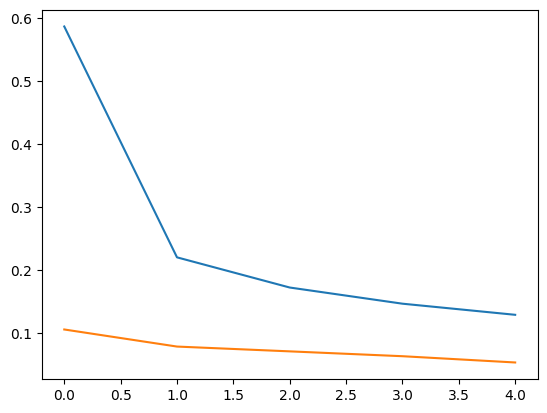

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

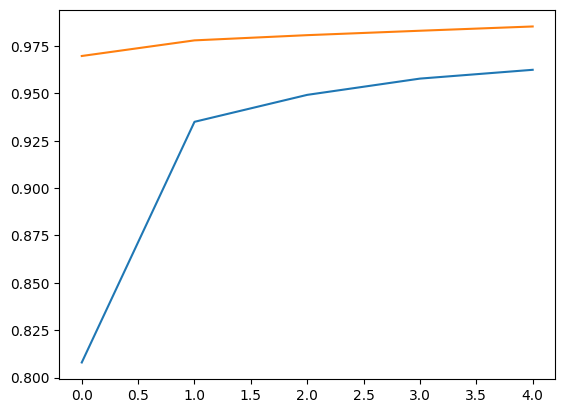

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

The above two graphs show that our model is a little bit overfitted(A neural network has the property to memorize the characteristics of training data. This is called overfitting).
This can be avoided by using techniques known as dropouts, and regularization to improve the performance of our neural network.

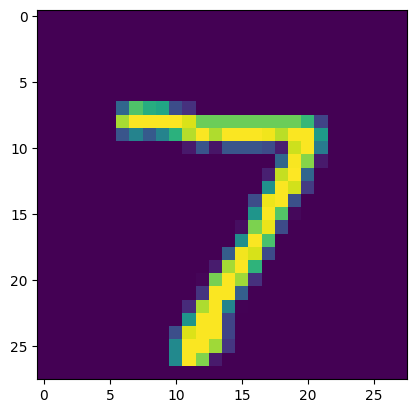

In [25]:
plt.imshow(X_test[0])

In [42]:
#Saving the model
model.save('model.model')

INFO:tensorflow:Assets written to: model.model\assets


INFO:tensorflow:Assets written to: model.model\assets


In [33]:
#evaluating the model
loss,acc=model.evaluate(X_test,y_test)
print("TEST LOSS:",loss*100)
print("TEST ACCURACY:",acc*100)

313/313 [==============================] - 5s 15ms/step - loss: 0.0604 - accuracy: 0.9829
TEST LOSS: 6.037183105945587
TEST ACCURACY: 98.29000234603882


In [36]:
#Saving the weights that is the knowledge
model.save_weights('MNIST.h5')